# Exercise 6.4 Supervised Machine Learning Regression Directions

This script contains the following:

    1. Importing libraries and data
    2. Data cleaning
    3. Data prep for regression analysis [Germany,France,United Kingdom]
    4. Regression analysis [Germany,France,United Kingdom]

# Importing libraries and Data

In [1]:
#importing libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
# creating path

path = r'C:\Users\stefa\Jupyter Analysis\14-04-2022 Achievement6'

In [4]:
# importing Dataframe

df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'Covid-data2.csv'), index_col = False)

In [5]:
# Mathploblib known issue checkup with Version

matplotlib.__version__

'3.4.3'

# 2. Data cleaning and Consistency Checks

Cleaning of Data was mostly done in previous Exercise, verification and doublecheck nonetheless

In [7]:
df.columns

Index(['location', 'date', 'total_cases', 'new_cases', 'new_cases_smoothed',
       'total_deaths', 'new_deaths', 'new_deaths_smoothed',
       'total_cases_per_million', 'new_cases_per_million',
       'new_cases_smoothed_per_million', 'total_deaths_per_million',
       'new_deaths_per_million', 'new_deaths_smoothed_per_million',
       'reproduction_rate', 'icu_patients', 'icu_patients_per_million',
       'hosp_patients', 'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       'total_vaccinations_per_hundred', 'people_vaccina

In [8]:
df.head()

,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million,Vaccination Rate
0,Afghanistan,2020-02-24,5.0,5.0,0.0,0.0,0.0,0.0,0.126,0.126,...,0.0,37.746,0.5,64.83,0.511,0.0,0.0,0.0,0.0,Low Rate
1,Afghanistan,2020-02-25,5.0,0.0,0.0,0.0,0.0,0.0,0.126,0.000,...,0.0,37.746,0.5,64.83,0.511,0.0,0.0,0.0,0.0,Low Rate
2,Afghanistan,2020-02-26,5.0,0.0,0.0,0.0,0.0,0.0,0.126,0.000,...,0.0,37.746,0.5,64.83,0.511,0.0,0.0,0.0,0.0,Low Rate
3,Afghanistan,2020-02-27,5.0,0.0,0.0,0.0,0.0,0.0,0.126,0.000,...,0.0,37.746,0.5,64.83,0.511,0.0,0.0,0.0,0.0,Low Rate
4,Afghanistan,2020-02-28,5.0,0.0,0.0,0.0,0.0,0.0,0.126,0.000,...,0.0,37.746,0.5,64.83,0.511,0.0,0.0,0.0,0.0,Low Rate


In [9]:
# Code to display all rows and columns in Datasets

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Creating subsets for choosen Countries to be analysed

In [10]:
# We choose 3 Major European Countries for our analysis, this can be applied to any country we have data on

df2 = df[(df.values  == "Germany")]
df3 = df[(df.values  == "France")]
df4 = df[(df.values  == "United Kingdom")]

In [11]:
df2.shape

(814, 65)

In [12]:
df3.shape

(817, 65)

In [13]:
df4.shape

(810, 65)

In [14]:
# Check for missing values Germany

df2.isnull().sum()

location                                      0
date                                          0
total_cases                                   0
new_cases                                     0
new_cases_smoothed                            0
total_deaths                                  0
new_deaths                                    0
new_deaths_smoothed                           0
total_cases_per_million                       0
new_cases_per_million                         0
new_cases_smoothed_per_million                0
total_deaths_per_million                      0
new_deaths_per_million                        0
new_deaths_smoothed_per_million               0
reproduction_rate                             0
icu_patients                                  0
icu_patients_per_million                      0
hosp_patients                                 0
hosp_patients_per_million                     0
weekly_icu_admissions                         0
weekly_icu_admissions_per_million       

In [15]:
# Check for missing values France

df3.isnull().sum()

location                                      0
date                                          0
total_cases                                   0
new_cases                                     0
new_cases_smoothed                            0
total_deaths                                  0
new_deaths                                    0
new_deaths_smoothed                           0
total_cases_per_million                       0
new_cases_per_million                         0
new_cases_smoothed_per_million                0
total_deaths_per_million                      0
new_deaths_per_million                        0
new_deaths_smoothed_per_million               0
reproduction_rate                             0
icu_patients                                  0
icu_patients_per_million                      0
hosp_patients                                 0
hosp_patients_per_million                     0
weekly_icu_admissions                         0
weekly_icu_admissions_per_million       

In [16]:
# Check for missing values United Kingdom

df4.isnull().sum()

location                                      0
date                                          0
total_cases                                   0
new_cases                                     0
new_cases_smoothed                            0
total_deaths                                  0
new_deaths                                    0
new_deaths_smoothed                           0
total_cases_per_million                       0
new_cases_per_million                         0
new_cases_smoothed_per_million                0
total_deaths_per_million                      0
new_deaths_per_million                        0
new_deaths_smoothed_per_million               0
reproduction_rate                             0
icu_patients                                  0
icu_patients_per_million                      0
hosp_patients                                 0
hosp_patients_per_million                     0
weekly_icu_admissions                         0
weekly_icu_admissions_per_million       

No missing Values have been found in all three Countries

In [17]:
# duplicates check Germany

dups2 = df2.duplicated()

In [18]:
dups2.shape

(814,)

In [19]:
# duplicates check France

dups3 = df3.duplicated()

In [20]:
dups3.shape

(817,)

In [21]:
# duplicates check United Kingdom

dups4 = df4.duplicated()

In [22]:
dups4.shape

(810,)

No duplicates have been found in all three Countries

In [23]:
# creating deathrate column and choose Columns and Data we want to investigate ["location","date","total_vaccinations","people_fully_vaccinated","total_boosters","total_cases","weekly_icu_admissions", "total_deaths"]

columns = ["location","date","total_vaccinations","people_fully_vaccinated","total_boosters","total_cases","weekly_icu_admissions", "total_deaths"]

In [24]:
columns

['location',
 'date',
 'total_vaccinations',
 'people_fully_vaccinated',
 'total_boosters',
 'total_cases',
 'weekly_icu_admissions',
 'total_deaths']

In [25]:
#creation of subset Germany

total_death2 = df2[columns]

In [26]:
#creation of subset France

total_death3 = df3[columns]

In [27]:
#creation of subset United Kingdom

total_death4 = df4[columns]

In [29]:
total_death2

,location,date,total_vaccinations,people_fully_vaccinated,total_boosters,total_cases,weekly_icu_admissions,total_deaths
61064,Germany,2020-01-27,0.0,0.0,0.0,1.0,0.0,0.0
61065,Germany,2020-01-28,0.0,0.0,0.0,4.0,0.0,0.0
61066,Germany,2020-01-29,0.0,0.0,0.0,4.0,0.0,0.0
61067,Germany,2020-01-30,0.0,0.0,0.0,4.0,0.0,0.0
61068,Germany,2020-01-31,0.0,0.0,0.0,5.0,0.0,0.0
61069,Germany,2020-02-01,0.0,0.0,0.0,8.0,0.0,0.0
61070,Germany,2020-02-02,0.0,0.0,0.0,10.0,0.0,0.0
61071,Germany,2020-02-03,0.0,0.0,0.0,12.0,0.0,0.0
61072,Germany,2020-02-04,0.0,0.0,0.0,12.0,0.0,0.0
61073,Germany,2020-02-05,0.0,0.0,0.0,12.0,0.0,0.0


In [30]:
total_death3

,location,date,total_vaccinations,people_fully_vaccinated,total_boosters,total_cases,weekly_icu_admissions,total_deaths
57164,France,2020-01-24,0.0,0.0,0.0,2.0,0.0,0.0
57165,France,2020-01-25,0.0,0.0,0.0,3.0,0.0,0.0
57166,France,2020-01-26,0.0,0.0,0.0,3.0,0.0,0.0
57167,France,2020-01-27,0.0,0.0,0.0,3.0,0.0,0.0
57168,France,2020-01-28,0.0,0.0,0.0,4.0,0.0,0.0
57169,France,2020-01-29,0.0,0.0,0.0,5.0,0.0,0.0
57170,France,2020-01-30,0.0,0.0,0.0,5.0,0.0,0.0
57171,France,2020-01-31,0.0,0.0,0.0,5.0,0.0,0.0
57172,France,2020-02-01,0.0,0.0,0.0,6.0,0.0,0.0
57173,France,2020-02-02,0.0,0.0,0.0,6.0,0.0,0.0


In [31]:
total_death4

,location,date,total_vaccinations,people_fully_vaccinated,total_boosters,total_cases,weekly_icu_admissions,total_deaths
169042,United Kingdom,2020-01-31,0.0,0.0,0.0,2.0,0.0,0.0
169043,United Kingdom,2020-02-01,0.0,0.0,0.0,2.0,0.0,0.0
169044,United Kingdom,2020-02-02,0.0,0.0,0.0,2.0,0.0,0.0
169045,United Kingdom,2020-02-03,0.0,0.0,0.0,8.0,0.0,0.0
169046,United Kingdom,2020-02-04,0.0,0.0,0.0,8.0,0.0,0.0
169047,United Kingdom,2020-02-05,0.0,0.0,0.0,9.0,0.0,0.0
169048,United Kingdom,2020-02-06,0.0,0.0,0.0,9.0,0.0,0.0
169049,United Kingdom,2020-02-07,0.0,0.0,0.0,9.0,0.0,0.0
169050,United Kingdom,2020-02-08,0.0,0.0,0.0,13.0,0.0,0.0
169051,United Kingdom,2020-02-09,0.0,0.0,0.0,14.0,0.0,0.0


In [32]:
location_num = total_death2["location"]

In [33]:
total_death2.shape

(814, 8)

In [34]:
location_num = total_death3["location"]

In [35]:
total_death3.shape

(817, 8)

In [36]:
location_num = total_death4["location"]

In [37]:
total_death4.shape

(810, 8)

In [38]:
total_death2.dtypes

location                    object
date                        object
total_vaccinations         float64
people_fully_vaccinated    float64
total_boosters             float64
total_cases                float64
weekly_icu_admissions      float64
total_deaths               float64
dtype: object

In [39]:
total_death3.dtypes

location                    object
date                        object
total_vaccinations         float64
people_fully_vaccinated    float64
total_boosters             float64
total_cases                float64
weekly_icu_admissions      float64
total_deaths               float64
dtype: object

In [40]:
total_death4.dtypes

location                    object
date                        object
total_vaccinations         float64
people_fully_vaccinated    float64
total_boosters             float64
total_cases                float64
weekly_icu_admissions      float64
total_deaths               float64
dtype: object

In [41]:
total_death2['date'] = pd.to_datetime(total_death2['date'])

C:\Users\stefa\AppData\Local\Temp/ipykernel_25040/236758698.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total_death2['date'] = pd.to_datetime(total_death2['date'])


In [42]:
total_death3['date'] = pd.to_datetime(total_death3['date'])

C:\Users\stefa\AppData\Local\Temp/ipykernel_25040/3725297635.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total_death3['date'] = pd.to_datetime(total_death3['date'])


In [43]:
total_death4['date'] = pd.to_datetime(total_death4['date'])

C:\Users\stefa\AppData\Local\Temp/ipykernel_25040/969988306.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total_death4['date'] = pd.to_datetime(total_death4['date'])


In [45]:
# Create a 'deathrate' column germany

total_death2['deathrate'] = total_death2['total_deaths']

C:\Users\stefa\AppData\Local\Temp/ipykernel_25040/574757715.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total_death2['deathrate'] = total_death2['total_deaths']


In [46]:
# Create a 'deathrate' column france

total_death3['deathrate'] = total_death3['total_deaths']

C:\Users\stefa\AppData\Local\Temp/ipykernel_25040/246016219.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total_death3['deathrate'] = total_death3['total_deaths']


In [47]:
# Create a 'deathrate' column united kingdom

total_death4['deathrate'] = total_death4['total_deaths']

C:\Users\stefa\AppData\Local\Temp/ipykernel_25040/2794576865.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total_death4['deathrate'] = total_death4['total_deaths']


In [48]:
# Select only entries with a non-zero deathrate/outlier to avoid skewing data with non submitted data

total_death2 = total_death2[total_death2['deathrate'] >= 1]

In [49]:
total_death3 = total_death3[total_death3['deathrate'] >= 1]

In [50]:
total_death4 = total_death4[total_death4['deathrate'] >= 1]

In [51]:
total_death2 = total_death2[total_death2['total_vaccinations'] >= 1]

In [52]:
total_death3 = total_death3[total_death3['total_vaccinations'] >= 1]

In [53]:
total_death4 = total_death4[total_death4['total_vaccinations'] >= 1]

In [54]:
#creation of subset using relevant columns germany

dfgermany = total_death2[['location','date','total_vaccinations', 'people_fully_vaccinated', 'total_boosters', 'total_cases', 'weekly_icu_admissions', 'deathrate' ]]

In [55]:
#creation of subset using relevant columns france

dffrance = total_death3[['location','date','total_vaccinations', 'people_fully_vaccinated', 'total_boosters', 'total_cases', 'weekly_icu_admissions', 'deathrate'  ]]

In [56]:
#creation of subset using relevant columns United Kingdom

dfuk = total_death4[['location','date','total_vaccinations', 'people_fully_vaccinated', 'total_boosters', 'total_cases', 'weekly_icu_admissions', 'deathrate' ]]

In [57]:
dfgermany.dtypes

location                           object
date                       datetime64[ns]
total_vaccinations                float64
people_fully_vaccinated           float64
total_boosters                    float64
total_cases                       float64
weekly_icu_admissions             float64
deathrate                         float64
dtype: object

In [58]:
dffrance.dtypes

location                           object
date                       datetime64[ns]
total_vaccinations                float64
people_fully_vaccinated           float64
total_boosters                    float64
total_cases                       float64
weekly_icu_admissions             float64
deathrate                         float64
dtype: object

In [59]:
dfuk.dtypes

location                           object
date                       datetime64[ns]
total_vaccinations                float64
people_fully_vaccinated           float64
total_boosters                    float64
total_cases                       float64
weekly_icu_admissions             float64
deathrate                         float64
dtype: object

# Data Preparation for Regression Analysis Germany

C:\Users\stefa\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='deathrate', ylabel='Density'>

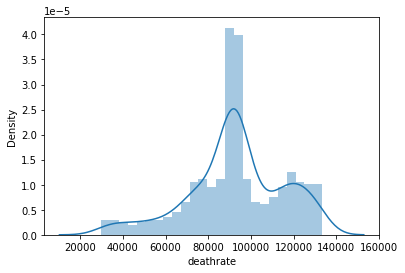

In [60]:
sns.distplot(dfgermany['deathrate'], bins=25) # Shows extreme values

# Some of the outliers in the high values may need to be removed, but let's try without doing so first.

In [61]:
# Check the mean

dfgermany['deathrate'].mean()

92723.59081419624

In [62]:
# Check the median

dfgermany['deathrate'].median()

91980.0

In [63]:
# Check the max 

dfgermany['deathrate'].max()

133308.0

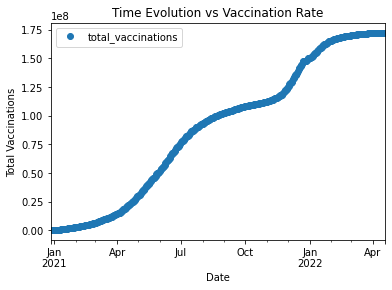

In [66]:
# date vs total Vaccinations

dfgermany.plot(x = 'date', y='total_vaccinations',style='o')
plt.title('Time Evolution vs Vaccination Rate')  
plt.xlabel('Date')  
plt.ylabel('Total Vaccinations')  
plt.show()

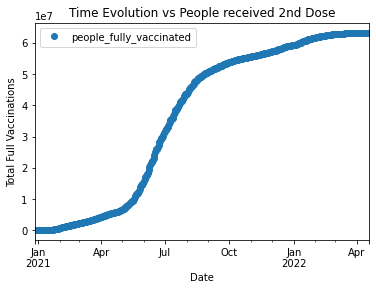

In [67]:
# date vs people_fully_vaccinated aka 2nd Vaccination dose

dfgermany.plot(x = 'date', y='people_fully_vaccinated',style='o')
plt.title('Time Evolution vs People received 2nd Dose')  
plt.xlabel('Date')  
plt.ylabel('Total Full Vaccinations')  
plt.show()

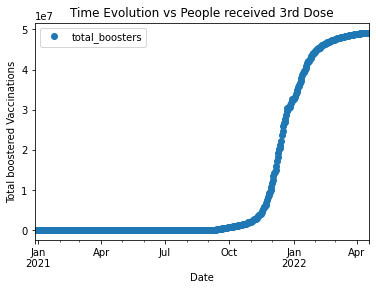

In [68]:
# date vs 'total_boosters' aka 3rd Vaccination dose

dfgermany.plot(x = 'date', y='total_boosters',style='o')
plt.title('Time Evolution vs People received 3rd Dose')  
plt.xlabel('Date')  
plt.ylabel('Total boostered Vaccinations')  
plt.show()

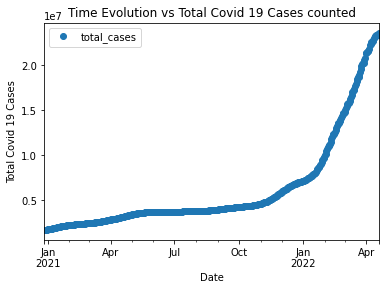

In [69]:
# date vs 'total_cases' of Covid 19 counted

dfgermany.plot(x = 'date', y='total_cases',style='o')
plt.title('Time Evolution vs Total Covid 19 Cases counted')  
plt.xlabel('Date')  
plt.ylabel('Total Covid 19 Cases')  
plt.show()

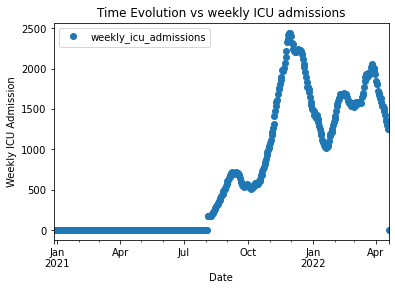

In [70]:
# date vs 'weekly_icu_admissions' of Covid 19 (icu = intensive Care Unit in Hospitals)

dfgermany.plot(x = 'date', y='weekly_icu_admissions',style='o')
plt.title('Time Evolution vs weekly ICU admissions')  
plt.xlabel('Date')  
plt.ylabel('Weekly ICU Admission')  
plt.show()

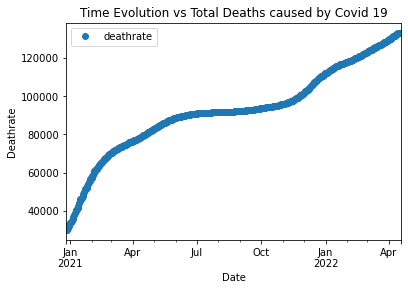

In [71]:
# date vs total_death aka deathrate

dfgermany.plot(x = 'date', y='deathrate',style='o')
plt.title('Time Evolution vs Total Deaths caused by Covid 19')  
plt.xlabel('Date')  
plt.ylabel('Deathrate')  
plt.show()

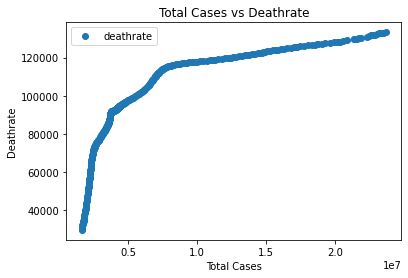

In [74]:
dfgermany.plot(x = 'total_cases', y='deathrate',style='o')
plt.title('Total Cases vs Deathrate')  
plt.xlabel('Total Cases')  
plt.ylabel('Deathrate')  
plt.show()

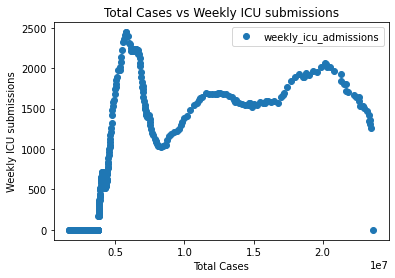

In [75]:
dfgermany.plot(x = 'total_cases', y='weekly_icu_admissions',style='o')
plt.title('Total Cases vs Weekly ICU submissions')  
plt.xlabel('Total Cases')  
plt.ylabel('Weekly ICU submissions')  
plt.show()

In the above created Scatterplots for Germany we can see a clear relation between the different points created compared with each country. 

In the Scatterplots different factors are playing a Key role such as lifting Mask and Test Restrictions which resulted in more cases and more deaths as visible in recent data. Same goes for weekly ICU submissions which are matching Restrictions lifts . It is to be noted there that with more time Evolving, the more experienced the Hospitals are and less people need to be admissed into ICU 


The Hypothesis i want to prove is confirmed so far that with more time evolving, the more experienced Hospitals are in taken care of patients with Covid 19, the less people will be death because of it which we can see as the curves are flattening.

 # 4. Regression Analysis Germany Data

In [113]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = dfgermany['total_cases'].values.reshape(-1,1)
y = dfgermany['deathrate'].values.reshape(-1,1)

In [114]:
X 

array([[ 1640858.],
       [ 1651834.],
       [ 1664726.],
       [ 1687185.],
       [ 1719737.],
       [ 1742661.],
       [ 1755351.],
       [ 1765666.],
       [ 1775513.],
       [ 1787410.],
       [ 1808647.],
       [ 1835038.],
       [ 1866887.],
       [ 1891581.],
       [ 1908527.],
       [ 1921024.],
       [ 1933826.],
       [ 1953426.],
       [ 1978590.],
       [ 2000958.],
       [ 2019636.],
       [ 2033518.],
       [ 2040659.],
       [ 2052028.],
       [ 2068002.],
       [ 2088400.],
       [ 2106262.],
       [ 2122679.],
       [ 2134936.],
       [ 2141665.],
       [ 2148077.],
       [ 2161275.],
       [ 2178828.],
       [ 2192850.],
       [ 2205171.],
       [ 2216363.],
       [ 2221971.],
       [ 2228085.],
       [ 2237790.],
       [ 2252001.],
       [ 2264909.],
       [ 2275394.],
       [ 2284010.],
       [ 2288545.],
       [ 2291924.],
       [ 2299996.],
       [ 2310233.],
       [ 2320093.],
       [ 2328447.],
       [ 2334561.],


In [115]:
y

array([[ 29778.],
       [ 30126.],
       [ 30978.],
       [ 32107.],
       [ 33071.],
       [ 33624.],
       [ 33960.],
       [ 34272.],
       [ 34574.],
       [ 35518.],
       [ 36537.],
       [ 37607.],
       [ 38795.],
       [ 39878.],
       [ 40343.],
       [ 40686.],
       [ 41577.],
       [ 42637.],
       [ 43881.],
       [ 44994.],
       [ 45974.],
       [ 46419.],
       [ 46633.],
       [ 47622.],
       [ 48770.],
       [ 49783.],
       [ 50642.],
       [ 51521.],
       [ 51870.],
       [ 52087.],
       [ 52990.],
       [ 53972.],
       [ 54913.],
       [ 55752.],
       [ 56546.],
       [ 56945.],
       [ 57120.],
       [ 57981.],
       [ 58956.],
       [ 59742.],
       [ 60597.],
       [ 61286.],
       [ 61517.],
       [ 61675.],
       [ 62156.],
       [ 62969.],
       [ 63635.],
       [ 64191.],
       [ 64742.],
       [ 64960.],
       [ 65076.],
       [ 65604.],
       [ 66164.],
       [ 66698.],
       [ 67206.],
       [ 6

In [116]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [117]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [118]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [119]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

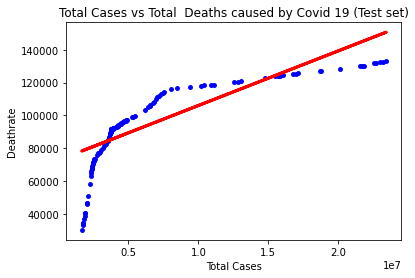

In [120]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='blue', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Total Cases vs Total  Deaths caused by Covid 19 (Test set)')
plot_test.xlabel('Total Cases')
plot_test.ylabel('Deathrate')
plot_test.show()

In [121]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [122]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.00333098]]
Mean squared error:  235231497.7844783
R2 score:  0.6128432918907266


An R2 score of 0.61 shows that this model is a poor/medium fit

In [123]:
y_predicted

array([[ 79129.93416301],
       [ 83995.07438778],
       [ 84718.72657681],
       [ 86437.54583979],
       [ 85109.53053644],
       [ 84732.74667386],
       [126114.05407845],
       [121846.70494342],
       [ 83235.95058709],
       [ 79504.64948669],
       [ 93336.35626913],
       [ 83618.83347502],
       [129340.20198863],
       [ 90212.99575613],
       [ 86002.84288776],
       [ 85361.94890998],
       [ 81210.98756562],
       [ 82493.65156905],
       [ 88113.57865786],
       [ 95119.8098783 ],
       [147983.64005403],
       [ 82393.44235081],
       [ 85830.27811045],
       [ 80152.74837535],
       [100912.95461659],
       [ 89033.69207852],
       [ 85301.74476789],
       [150731.48913901],
       [125330.51752147],
       [ 94127.66067271],
       [124300.91477081],
       [ 78949.60487009],
       [116153.5062759 ],
       [ 95360.17676428],
       [ 99627.13284361],
       [ 85138.29688429],
       [ 88661.60822946],
       [ 85647.29069507],
       [ 880

In [124]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,40686.0,79129.934163
1,82850.0,83995.074388
2,86160.0,84718.726577
3,92837.0,86437.545840
4,89937.0,85109.530536
5,86381.0,84732.746674
6,124450.0,126114.054078
7,122702.0,121846.704943
8,80006.0,83235.950587
9,46419.0,79504.649487


In [125]:
# Predict.

y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [126]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [128]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.00333098]]
Mean squared error:  158802202.7323438
R2 score:  0.6514500406979346


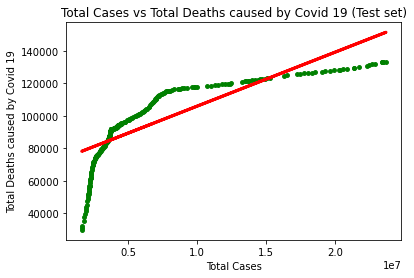

In [129]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Total Cases vs Total Deaths caused by Covid 19 (Test set)')
plot_test.xlabel('Total Cases')
plot_test.ylabel('Total Deaths caused by Covid 19')
plot_test.show()

# Bonus 

Visualizing the training set results without the outliers

In [131]:
# Clean the extreme values from the "deathrate" variable observed during the consistency checks.

df_test = dfgermany[dfgermany['deathrate'] <=100000]

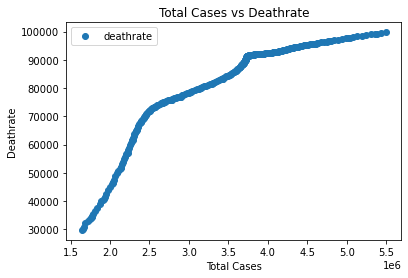

In [132]:
# Visualizing the training set results without the outliers

df_test.plot(x = 'total_cases', y='deathrate',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Total Cases vs Deathrate')  
plt.xlabel('Total Cases')  
plt.ylabel('Deathrate')  
plt.show()

In [133]:
# Reshape again.

X_2 = df_test['total_cases'].values.reshape(-1,1)
y_2 = df_test['deathrate'].values.reshape(-1,1)

In [134]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size=0.3, random_state=0)

In [135]:
# Run and fit the regression.

regression = LinearRegression()  
regression.fit(X_train_2, y_train_2)

LinearRegression()

In [136]:
# Predict.

y_predicted_2 = regression.predict(X_test_2)

In [137]:
rmse = mean_squared_error(y_test_2, y_predicted_2)
r2 = r2_score(y_test_2, y_predicted_2)

In [138]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.01696981]]
Mean squared error:  48869833.76995782
R2 score:  0.8431106425033111


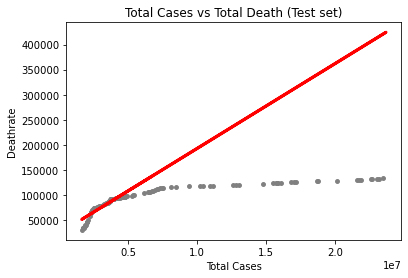

In [139]:
# Visualizing the test set results.
plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_train, regression.predict(X_train), color='red', linewidth =3)
plot_test.title('Total Cases vs Total Death (Test set)')
plot_test.xlabel('Total Cases')
plot_test.ylabel('Deathrate')
plot_test.show()

# Summary Regression Analysis Germany Data

The above Slope Graphs shows that Total Cases are flattening with a slight rise while the deathrates rised strongly at start only.  The Mean squared Error displays a huge difference between the comparison of estimated and true values and therefore this regression might have to be adjusted to predict the relationship between those two Variables corerctly. R2 Scores of 0.84 shows a medium to strong connection for our model.

Our Hypothesis so far is as expected and confirmed in the Scatterplots ,which are flattening, while total cases are rising and Graphs that with more experience, time, vaccinations and herd immunity and people fully vaccinated aswell as other points, Covid 19 can be treated better and therefore less people will die


The recent rise in Deathrate is to be caused by restrictions that have been lifted in germany which of course led to more infections/deaths where however the ICU submission is decreasing.

Vaccinations protects, but does not prevent Covid.

# Data Preparation for Regression Analysis France Data

C:\Users\stefa\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='deathrate', ylabel='Density'>

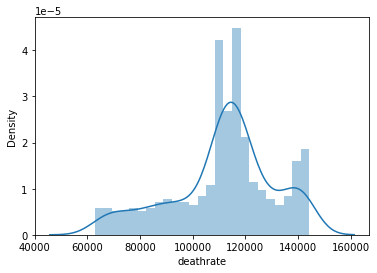

In [146]:
sns.distplot(dffrance['deathrate'], bins=25) # Shows extreme values

# Some of the outliers in the high values may need to be removed, but let's try without doing so first.

In [147]:
# Check the mean

dffrance['deathrate'].mean()

111552.73430962343

In [148]:
# Check the median

dffrance['deathrate'].median()

113565.5

In [149]:
# Check the max 

dffrance['deathrate'].max()

144274.0

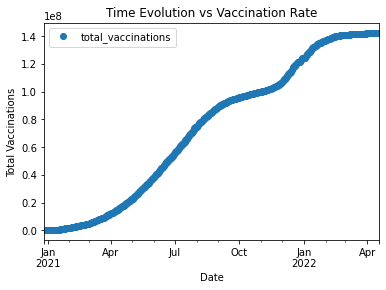

In [150]:
# date vs total_vaccinations

dffrance.plot(x = 'date', y='total_vaccinations',style='o')
plt.title('Time Evolution vs Vaccination Rate')  
plt.xlabel('Date')  
plt.ylabel('Total Vaccinations')  
plt.show()

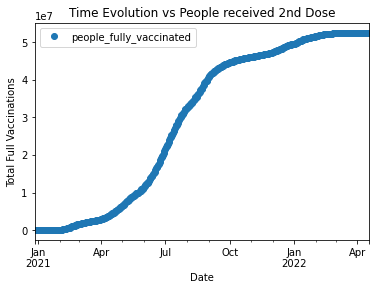

In [151]:
# date vs people_fully_vaccinated aka 2nd Vaccination dose

dffrance.plot(x = 'date', y='people_fully_vaccinated',style='o')
plt.title('Time Evolution vs People received 2nd Dose')  
plt.xlabel('Date')  
plt.ylabel('Total Full Vaccinations')  
plt.show()

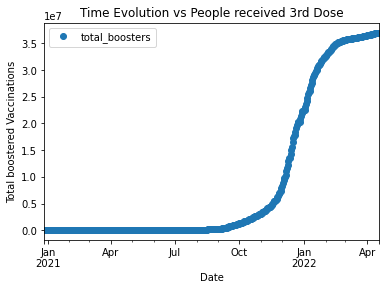

In [152]:
# date vs 'total_boosters' aka 3rd Vaccination dose

dffrance.plot(x = 'date', y='total_boosters',style='o')
plt.title('Time Evolution vs People received 3rd Dose')  
plt.xlabel('Date')  
plt.ylabel('Total boostered Vaccinations')  
plt.show()

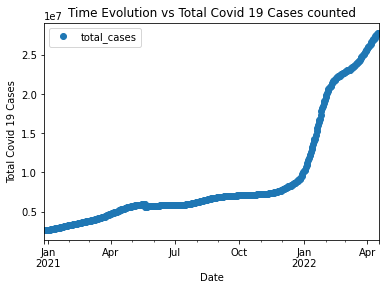

In [153]:
# date vs 'total_cases' of Covid 19 counted

dffrance.plot(x = 'date', y='total_cases',style='o')
plt.title('Time Evolution vs Total Covid 19 Cases counted')  
plt.xlabel('Date')  
plt.ylabel('Total Covid 19 Cases')  
plt.show()

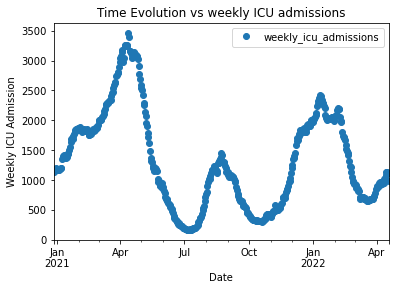

In [154]:
# date vs 'weekly_icu_admissions' of Covid 19 (icu = intensive Care Unit in Hospitals)

dffrance.plot(x = 'date', y='weekly_icu_admissions',style='o')
plt.title('Time Evolution vs weekly ICU admissions')  
plt.xlabel('Date')  
plt.ylabel('Weekly ICU Admission')  
plt.show()

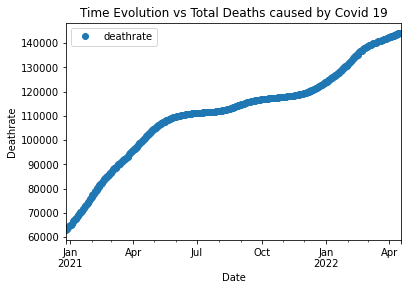

In [155]:
# date vs total_death aka deathrate

dffrance.plot(x = 'date', y='deathrate',style='o')
plt.title('Time Evolution vs Total Deaths caused by Covid 19')  
plt.xlabel('Date')  
plt.ylabel('Deathrate')  
plt.show()

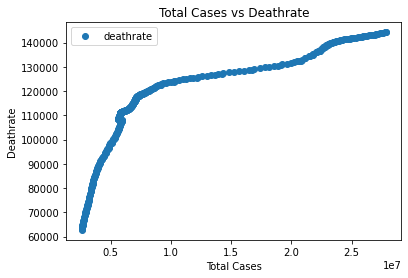

In [156]:
dffrance.plot(x = 'total_cases', y='deathrate',style='o')
plt.title('Total Cases vs Deathrate')  
plt.xlabel('Total Cases')  
plt.ylabel('Deathrate')  
plt.show()

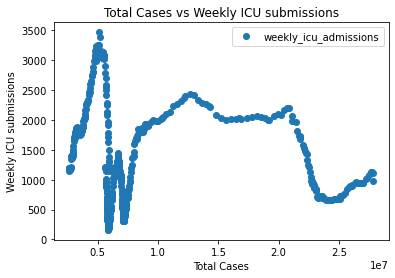

In [157]:
dffrance.plot(x = 'total_cases', y='weekly_icu_admissions',style='o')
plt.title('Total Cases vs Weekly ICU submissions')  
plt.xlabel('Total Cases')  
plt.ylabel('Weekly ICU submissions')  
plt.show()

In the above created Scatterplots for France we can see a clear relation between the different points created compared with each country. 

In the Scatterplots different factors are playing a Key role such as lifting Mask and Test Restrictions which resulted in more cases and more deaths as visible in recent data. Same goes for weekly ICU submissions which are matching Restrictions lifts . It is to be noted there that with more time Evolving, the more experienced the Hospitals are and less people need to be admissed into ICU. 


The Hypothesis i want to prove is confirmed so far that with more time evolving, the more experienced Hospitals are in taken care of patients with Covid 19, the less people will be death because of it which we can see as the curves are flattening.

# 4. Regression Analysis France Data

In [158]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = dffrance['total_cases'].values.reshape(-1,1)
y = dffrance['deathrate'].values.reshape(-1,1)

In [159]:
X

array([[ 2599937.],
       [ 2602897.],
       [ 2614292.],
       [ 2640749.],
       [ 2660676.],
       [ 2680034.],
       [ 2683500.],
       [ 2695989.],
       [ 2700011.],
       [ 2720744.],
       [ 2745887.],
       [ 2767590.],
       [ 2787404.],
       [ 2807581.],
       [ 2823525.],
       [ 2827242.],
       [ 2846936.],
       [ 2870788.],
       [ 2892016.],
       [ 2913287.],
       [ 2934693.],
       [ 2951335.],
       [ 2955071.],
       [ 2979094.],
       [ 3005852.],
       [ 3028439.],
       [ 3051731.],
       [ 3075824.],
       [ 3094260.],
       [ 3098500.],
       [ 3120586.],
       [ 3147502.],
       [ 3171272.],
       [ 3194477.],
       [ 3218522.],
       [ 3237858.],
       [ 3242205.],
       [ 3265542.],
       [ 3291904.],
       [ 3291904.],
       [ 3337491.],
       [ 3358077.],
       [ 3377792.],
       [ 3382109.],
       [ 3401113.],
       [ 3426500.],
       [ 3447563.],
       [ 3468264.],
       [ 3489495.],
       [ 3506170.],


In [160]:
y

array([[ 62758.],
       [ 63121.],
       [ 64090.],
       [ 64393.],
       [ 64644.],
       [ 64777.],
       [ 64933.],
       [ 65049.],
       [ 65427.],
       [ 66295.],
       [ 66577.],
       [ 66853.],
       [ 67443.],
       [ 67611.],
       [ 67762.],
       [ 68072.],
       [ 68814.],
       [ 69043.],
       [ 69325.],
       [ 69961.],
       [ 70154.],
       [ 70295.],
       [ 70698.],
       [ 71354.],
       [ 71664.],
       [ 72010.],
       [ 72659.],
       [ 72889.],
       [ 73061.],
       [ 73506.],
       [ 74118.],
       [ 74468.],
       [ 74812.],
       [ 75633.],
       [ 75874.],
       [ 76069.],
       [ 76524.],
       [ 77250.],
       [ 77607.],
       [ 77607.],
       [ 78615.],
       [ 78806.],
       [ 78977.],
       [ 79435.],
       [ 80159.],
       [ 80455.],
       [ 80815.],
       [ 81460.],
       [ 81659.],
       [ 81826.],
       [ 82238.],
       [ 82824.],
       [ 83134.],
       [ 83405.],
       [ 83976.],
       [ 8

In [161]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [162]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [163]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [164]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

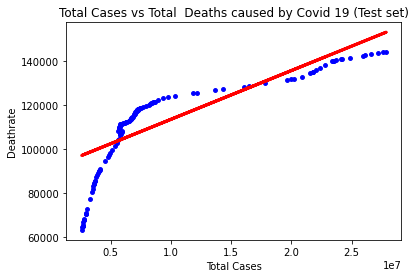

In [165]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='blue', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Total Cases vs Total  Deaths caused by Covid 19 (Test set)')
plot_test.xlabel('Total Cases')
plot_test.ylabel('Deathrate')
plot_test.show()

In [166]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [167]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.00222319]]
Mean squared error:  157233427.05570757
R2 score:  0.6288700433605657


An R2 score of 0.62 shows that this model is a poor/medium fit

In [168]:
y_predicted

array([[ 97531.65481593],
       [103826.01704118],
       [104198.78192675],
       [103939.31759324],
       [118275.29115718],
       [104414.2581763 ],
       [104452.51931676],
       [111109.21743223],
       [103113.46832865],
       [ 97807.537425  ],
       [152665.34905158],
       [103507.76705538],
       [103719.31937043],
       [107689.00273154],
       [103964.21290124],
       [105359.83968843],
       [100265.39440404],
       [102319.7197385 ],
       [107287.45639773],
       [110155.5812942 ],
       [106179.5840668 ],
       [102101.95804721],
       [139684.70913655],
       [ 98506.08002568],
       [140220.4718161 ],
       [106828.81626102],
       [143344.54617898],
       [104214.31314855],
       [107909.97026622],
       [109366.44805139],
       [112080.08331102],
       [ 97443.08727884],
       [139169.71107361],
       [123091.7573621 ],
       [110284.81101949],
       [104234.07955179],
       [107391.33283739],
       [106071.62806917],
       [1082

In [169]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,68072.0,97531.654816
1,104528.0,103826.017041
2,111180.0,104198.781927
3,109544.0,103939.317593
4,125503.0,118275.291157
5,107827.0,104414.258176
6,108055.0,104452.519317
7,122357.0,111109.217432
8,101194.0,103113.468329
9,70295.0,97807.537425


In [170]:
# Predict.

y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [171]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [172]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.00222319]]
Mean squared error:  117003203.50940974
R2 score:  0.6745422626024544


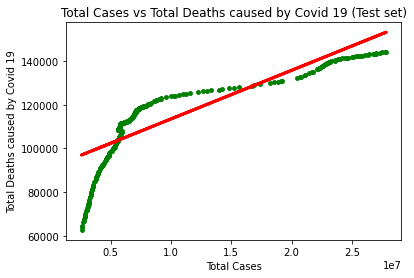

In [173]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Total Cases vs Total Deaths caused by Covid 19 (Test set)')
plot_test.xlabel('Total Cases')
plot_test.ylabel('Total Deaths caused by Covid 19')
plot_test.show()

# Bonus

Visualizing the training set results without the outliers

In [174]:
# Clean the extreme values from the "deathrate" variable observed during the consistency checks.

df_test = dffrance[dffrance['deathrate'] <=130000]

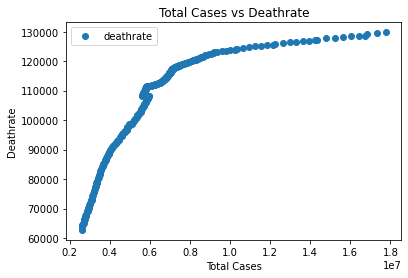

In [175]:
# Visualizing the training set results without the outliers

df_test.plot(x = 'total_cases', y='deathrate',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Total Cases vs Deathrate')  
plt.xlabel('Total Cases')  
plt.ylabel('Deathrate')  
plt.show()

In [176]:
# Reshape again.

X_2 = df_test['total_cases'].values.reshape(-1,1)
y_2 = df_test['deathrate'].values.reshape(-1,1)

In [177]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size=0.3, random_state=0)

In [178]:
# Run and fit the regression.

regression = LinearRegression()  
regression.fit(X_train_2, y_train_2)

LinearRegression()

In [179]:
# Predict.

y_predicted_2 = regression.predict(X_test_2)

In [180]:
rmse = mean_squared_error(y_test_2, y_predicted_2)
r2 = r2_score(y_test_2, y_predicted_2)

In [181]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.00498122]]
Mean squared error:  95893146.10884655
R2 score:  0.6624546974684066


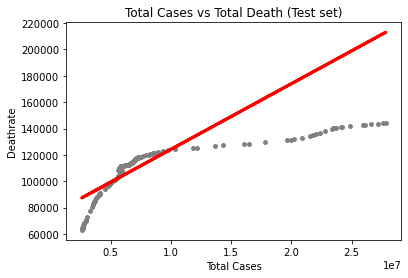

In [182]:
# Visualizing the test set results.
plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_train, regression.predict(X_train), color='red', linewidth =3)
plot_test.title('Total Cases vs Total Death (Test set)')
plot_test.xlabel('Total Cases')
plot_test.ylabel('Deathrate')
plot_test.show()

# Summary Regression Analysis France Data

The above Slope Graphs shows that Total Cases are flattening with a slight rise while the deathrates rised strongly at start only.  The Mean squared Error displays a huge difference between the comparison of estimated and true values and therefore this regression might have to be adjusted to predict the relationship between those two Variables corerctly. R2 Scores of 0.66 shows a poor to medium connection for our model.

Our Hypothesis so far is as expected and confirmed in the Scatterplots ,which are flattening, while total cases are rising and Graphs that with more experience, time, vaccinations and herd immunity and people fully vaccinated aswell as other points, Covid 19 can be treated better and therefore less people will die


The recent rise in Deathrate is to be caused by restrictions that have been lifted in germany which of course led to more infections/deaths where however the ICU submission is decreasing.

Vaccinations protects, but does not prevent Covid.

# Data Preparation for Regression Analysis United Kingdom

C:\Users\stefa\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='deathrate', ylabel='Density'>

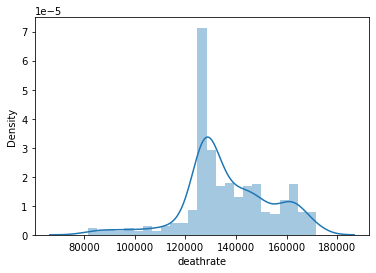

In [183]:
sns.distplot(dfuk['deathrate'], bins=25) # Shows extreme values

# Some of the outliers in the high values may need to be removed, but let's try without doing so first.

In [184]:
# Check the mean

dfuk['deathrate'].mean()

136588.54211663068

In [185]:
# Check the median

dfuk['deathrate'].median()

132532.0

In [186]:
# Check the max 

dfuk['deathrate'].max()

171560.0

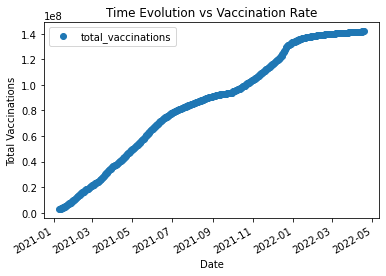

In [187]:
# date vs total_vaccinations

dfuk.plot(x = 'date', y='total_vaccinations',style='o')
plt.title('Time Evolution vs Vaccination Rate')  
plt.xlabel('Date')  
plt.ylabel('Total Vaccinations')  
plt.show()

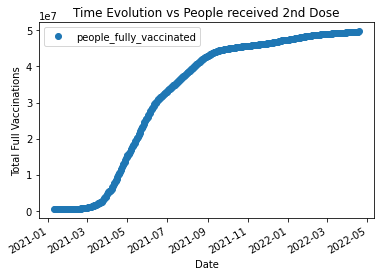

In [188]:
# date vs people_fully_vaccinated aka 2nd Vaccination dose

dfuk.plot(x = 'date', y='people_fully_vaccinated',style='o')
plt.title('Time Evolution vs People received 2nd Dose')  
plt.xlabel('Date')  
plt.ylabel('Total Full Vaccinations')  
plt.show()

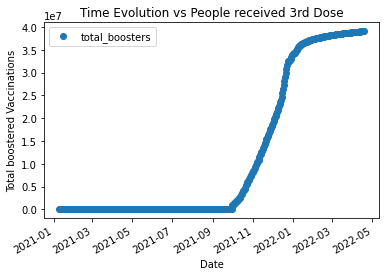

In [189]:
# date vs 'total_boosters' aka 3rd Vaccination dose

dfuk.plot(x = 'date', y='total_boosters',style='o')
plt.title('Time Evolution vs People received 3rd Dose')  
plt.xlabel('Date')  
plt.ylabel('Total boostered Vaccinations')  
plt.show()

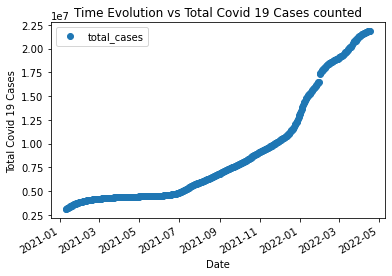

In [190]:
# date vs 'total_cases' of Covid 19 counted

dfuk.plot(x = 'date', y='total_cases',style='o')
plt.title('Time Evolution vs Total Covid 19 Cases counted')  
plt.xlabel('Date')  
plt.ylabel('Total Covid 19 Cases')  
plt.show()

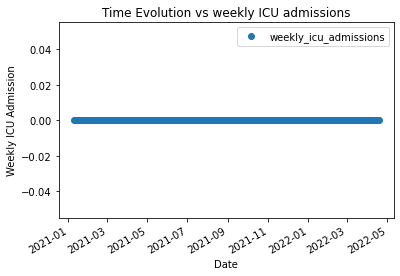

In [191]:
# date vs 'weekly_icu_admissions' of Covid 19 (icu = intensive Care Unit in Hospitals)

dfuk.plot(x = 'date', y='weekly_icu_admissions',style='o')
plt.title('Time Evolution vs weekly ICU admissions')  
plt.xlabel('Date')  
plt.ylabel('Weekly ICU Admission')  
plt.show()

It seems these Data has not been provided by the UK Government

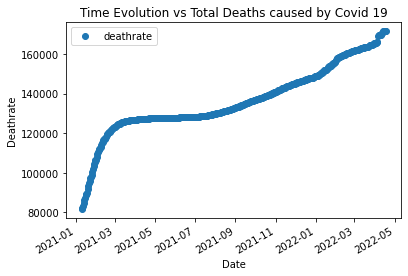

In [192]:
# date vs total_death aka deathrate

dfuk.plot(x = 'date', y='deathrate',style='o')
plt.title('Time Evolution vs Total Deaths caused by Covid 19')  
plt.xlabel('Date')  
plt.ylabel('Deathrate')  
plt.show()

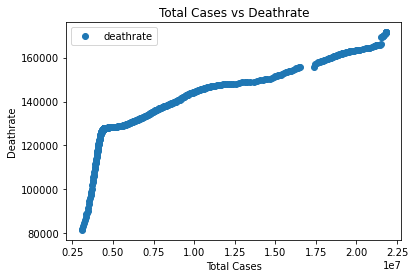

In [193]:
dfuk.plot(x = 'total_cases', y='deathrate',style='o')
plt.title('Total Cases vs Deathrate')  
plt.xlabel('Total Cases')  
plt.ylabel('Deathrate')  
plt.show()

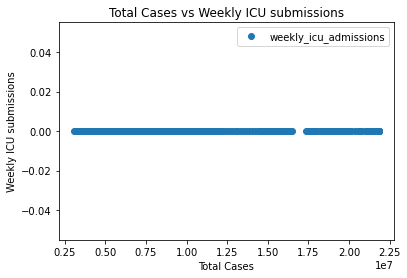

In [194]:
dfuk.plot(x = 'total_cases', y='weekly_icu_admissions',style='o')
plt.title('Total Cases vs Weekly ICU submissions')  
plt.xlabel('Total Cases')  
plt.ylabel('Weekly ICU submissions')  
plt.show()

No Data to be shown here aswell because of missing ICU Data

In the above created Scatterplots for the United Kingdom we can see a clear relation between the different points created compared with each country. 

In the Scatterplots different factors are playing a Key role such as lifting Mask and Test Restrictions which resulted in more cases and more deaths as visible in recent data.  It is to be noted there that with more time Evolving, the more experienced the Hospitals are and less people need to be admissed into ICU.

Note:

Due to missing ICU Data we cannot compare and evaluate this Part in the UK Data


The Hypothesis i want to prove is confirmed so far that with more time evolving, the more experienced Hospitals are in taken care of patients with Covid 19, the less people will be death because of it which we can see as the curves are flattening.

# 4. Regression Analysis United Kingdom Data

In [195]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = dfuk['total_cases'].values.reshape(-1,1)
y = dfuk['deathrate'].values.reshape(-1,1)

In [196]:
X

array([[ 3075573.],
       [ 3121787.],
       [ 3167339.],
       [ 3214879.],
       [ 3263571.],
       [ 3319349.],
       [ 3360703.],
       [ 3399312.],
       [ 3436854.],
       [ 3470214.],
       [ 3509128.],
       [ 3547033.],
       [ 3587307.],
       [ 3620865.],
       [ 3650890.],
       [ 3673095.],
       [ 3693227.],
       [ 3718548.],
       [ 3747255.],
       [ 3776362.],
       [ 3799677.],
       [ 3820811.],
       [ 3839472.],
       [ 3856359.],
       [ 3875597.],
       [ 3896269.],
       [ 3915414.],
       [ 3933693.],
       [ 3949562.],
       [ 3963677.],
       [ 3976063.],
       [ 3989093.],
       [ 4002601.],
       [ 4017757.],
       [ 4031078.],
       [ 4042063.],
       [ 4051838.],
       [ 4062470.],
       [ 4075191.],
       [ 4087252.],
       [ 4099283.],
       [ 4109694.],
       [ 4119532.],
       [ 4130174.],
       [ 4138667.],
       [ 4148605.],
       [ 4158591.],
       [ 4167114.],
       [ 4174550.],
       [ 4180588.],


In [197]:
y

array([[ 81504.],
       [ 82033.],
       [ 83276.],
       [ 84842.],
       [ 86090.],
       [ 87371.],
       [ 88666.],
       [ 89339.],
       [ 89938.],
       [ 91548.],
       [ 93368.],
       [ 94658.],
       [ 96059.],
       [ 97407.],
       [ 98018.],
       [ 98610.],
       [100241.],
       [101966.],
       [103205.],
       [104451.],
       [105652.],
       [106240.],
       [106646.],
       [108095.],
       [109417.],
       [110333.],
       [111347.],
       [112175.],
       [112548.],
       [112881.],
       [113933.],
       [114934.],
       [115612.],
       [116370.],
       [116991.],
       [117250.],
       [117480.],
       [118279.],
       [119018.],
       [119472.],
       [120005.],
       [120450.],
       [120665.],
       [120842.],
       [121390.],
       [121832.],
       [122155.],
       [122501.],
       [122791.],
       [122935.],
       [123039.],
       [123382.],
       [123869.],
       [124111.],
       [124347.],
       [12

In [198]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [199]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [200]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [201]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

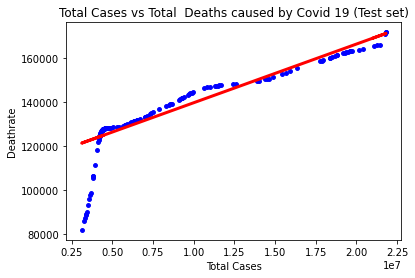

In [202]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='blue', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Total Cases vs Total  Deaths caused by Covid 19 (Test set)')
plot_test.xlabel('Total Cases')
plot_test.ylabel('Deathrate')
plot_test.show()

In [203]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [204]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.0026583]]
Mean squared error:  85315421.64569482
R2 score:  0.7656582931156147


An R2 Score of 0.76 is a medium to strong fit for our model

In [205]:
y_predicted

array([[124804.49228639],
       [123195.97321802],
       [124580.7617353 ],
       [124834.37158482],
       [130410.73388703],
       [164912.43422324],
       [154643.87368077],
       [124485.66634891],
       [124661.44913258],
       [146007.54690607],
       [124870.88600149],
       [124728.61375484],
       [141855.18837118],
       [160828.9761809 ],
       [125187.30617694],
       [126086.15203295],
       [139599.47147052],
       [122575.24940112],
       [137975.71236497],
       [165560.18764036],
       [135062.87685427],
       [132664.08490018],
       [125458.73727351],
       [124772.01051169],
       [150377.22151276],
       [131726.28962419],
       [122367.42612066],
       [122803.29969064],
       [143543.63190456],
       [125207.5544524 ],
       [151985.66614871],
       [160340.49484258],
       [137257.67613901],
       [121337.75731858],
       [137723.44761553],
       [166615.25916272],
       [165106.11268636],
       [143080.80848337],
       [1464

In [206]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,127625.0,124804.492286
1,106240.0,123195.973218
2,126701.0,124580.761735
3,127689.0,124834.371585
4,131773.0,130410.733887
5,162770.0,164912.434223
6,153326.0,154643.873681
7,126258.0,124485.666349
8,127166.0,124661.449133
9,148144.0,146007.546906


In [207]:
# Predict.

y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [208]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [209]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.0026583]]
Mean squared error:  37152651.263533585
R2 score:  0.858532045360749


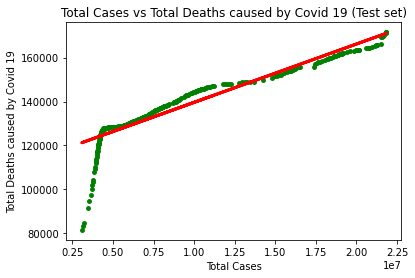

In [210]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Total Cases vs Total Deaths caused by Covid 19 (Test set)')
plot_test.xlabel('Total Cases')
plot_test.ylabel('Total Deaths caused by Covid 19')
plot_test.show()

# Bonus

Visualizing the training set results without the outliers

In [211]:
# Clean the extreme values from the "deathrate" variable observed during the consistency checks.

df_test = dfuk[dfuk['deathrate'] <=175000]

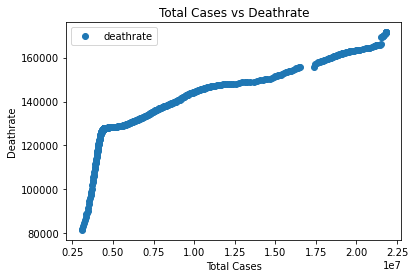

In [212]:
# Visualizing the training set results without the outliers

df_test.plot(x = 'total_cases', y='deathrate',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Total Cases vs Deathrate')  
plt.xlabel('Total Cases')  
plt.ylabel('Deathrate')  
plt.show()

In [213]:
# Reshape again.

X_2 = df_test['total_cases'].values.reshape(-1,1)
y_2 = df_test['deathrate'].values.reshape(-1,1)

In [214]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size=0.3, random_state=0)

In [215]:
# Run and fit the regression.

regression = LinearRegression()  
regression.fit(X_train_2, y_train_2)

LinearRegression()

In [216]:
# Predict.

y_predicted_2 = regression.predict(X_test_2)

In [217]:
rmse = mean_squared_error(y_test_2, y_predicted_2)
r2 = r2_score(y_test_2, y_predicted_2)

In [218]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.0026583]]
Mean squared error:  85315421.64569482
R2 score:  0.7656582931156147


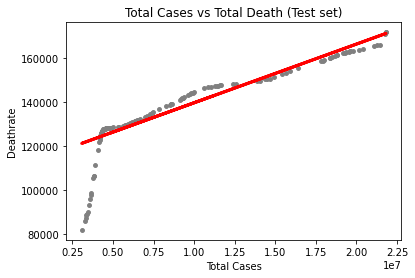

In [219]:
# Visualizing the test set results.
plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_train, regression.predict(X_train), color='red', linewidth =3)
plot_test.title('Total Cases vs Total Death (Test set)')
plot_test.xlabel('Total Cases')
plot_test.ylabel('Deathrate')
plot_test.show()

# Summary Regression Analysis United Kingdom Data

The above Slope Graphs shows that Total Cases are flattening with a slight rise while the deathrates rised strongly at start only. The Mean squared Error displays a huge difference between the comparison of estimated and true values and therefore this regression might have to be adjusted to predict the relationship between those two Variables corerctly. R2 Scores of 0.76 shows a medium connection for our model.

Our Hypothesis so far is as expected and confirmed in the Scatterplots ,which are flattening, while total cases are rising and Graphs that with more experience, time, vaccinations and herd immunity and people fully vaccinated aswell as other points, Covid 19 can be treated better and therefore less people will die

The recent rise in Deathrate is to be caused by restrictions that have been lifted in the UK aswell which of course led to more infections/deaths where however the ICU submission is decreasing.

Vaccinations protects, but does not prevent Covid.

# Next Steps

Next steps are currently planned to further adjust the Timeevolving Data and plot Data directly next to each other to show differences between the countries. As each countrie has/had different Covid Rules/Restrictions, this might give an interesting view on the Evolution of Covid. [Doing the same with real official Covid Data from China would be asweome too]